### ***Seaborn*** ###

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy

%matplotlib inline

In [6]:
tips = sns.load_dataset('tips')

In [7]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


    Distribution Plots

C:\Users\Avinash\AppData\Local\Temp\ipykernel_17444\4271412032.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['total_bill'])


<Axes: xlabel='total_bill', ylabel='Density'>

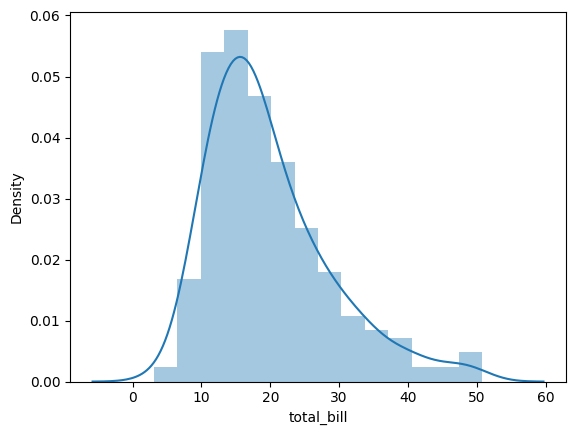

In [8]:
sns.distplot(tips['total_bill'])

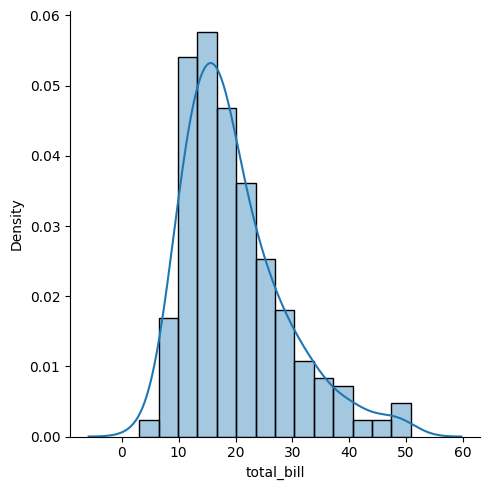

In [9]:
#replicating distplot
sns.displot(tips['total_bill'],kde=True,alpha=0.4,stat='density',kde_kws=dict(cut=3))

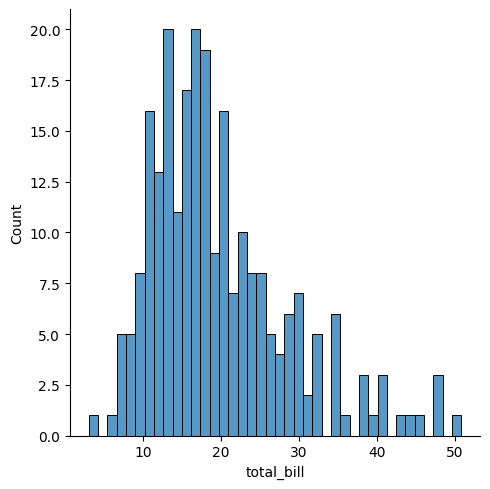

In [10]:
sns.displot(tips['total_bill'],bins=40)

    Jointplot

In [11]:
sns.jointplot(x='total_bill', y='tip', data=tips)

Error in callback <function flush_figures at 0x000001C3E9AB7BE0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

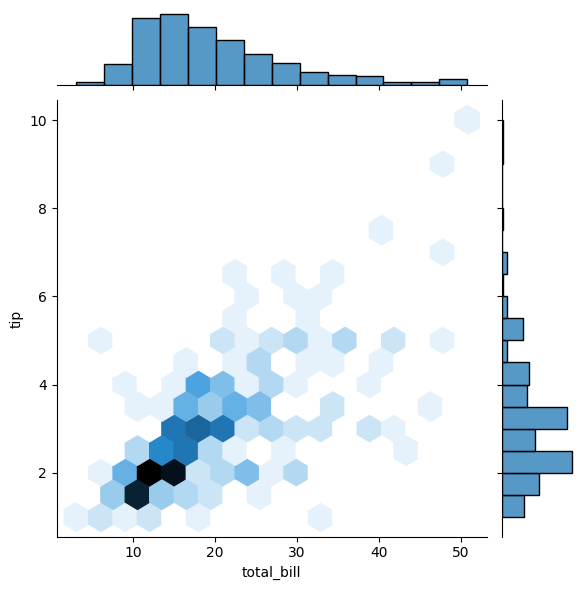

In [22]:
sns.jointplot(x='total_bill', y='tip', data=tips,kind='hex')

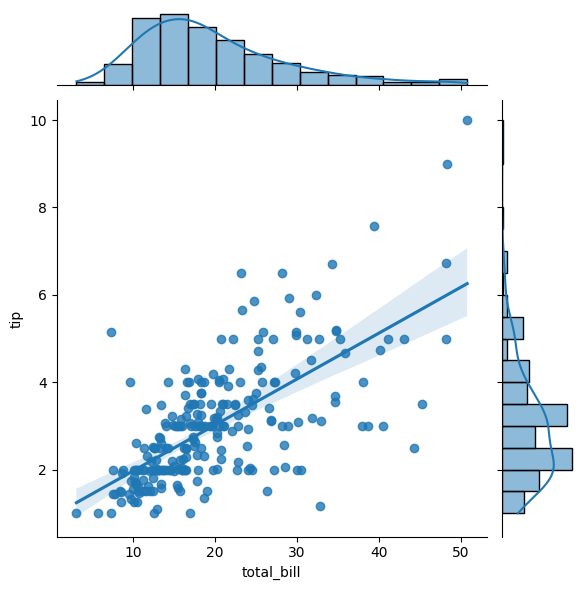

In [23]:
sns.jointplot(x='total_bill', y='tip', data=tips,kind='reg')

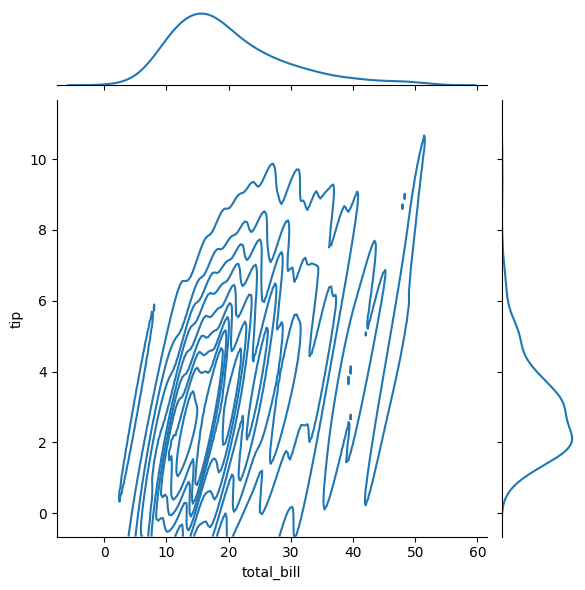

In [24]:
sns.jointplot(x='total_bill', y='tip', data=tips,kind='kde')

    Pairplot

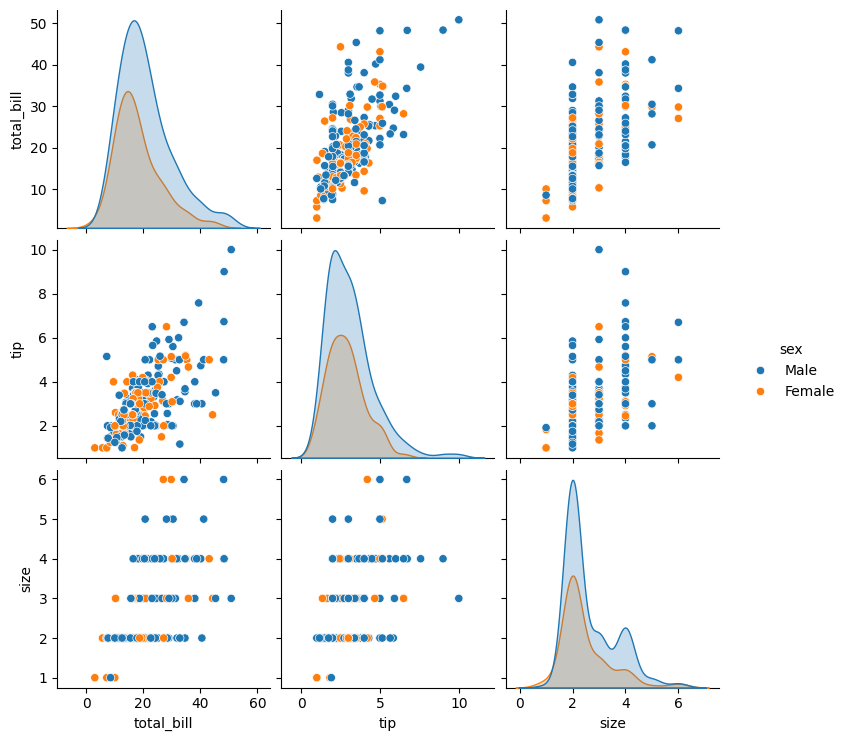

In [26]:
sns.pairplot(tips,hue='sex')

    Rugplot

<Axes: xlabel='total_bill'>

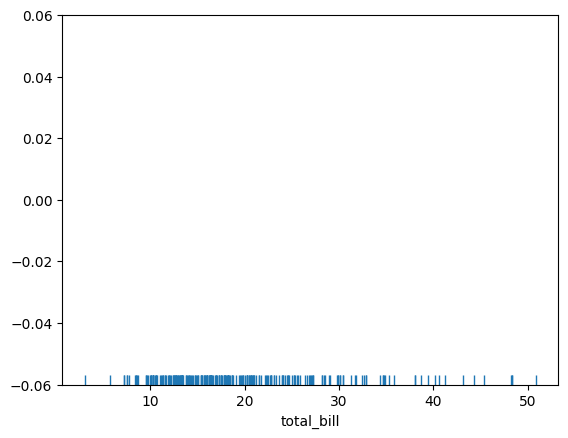

In [27]:
sns.rugplot(tips['total_bill'])

    KDEplot

(0.0, 1.0)

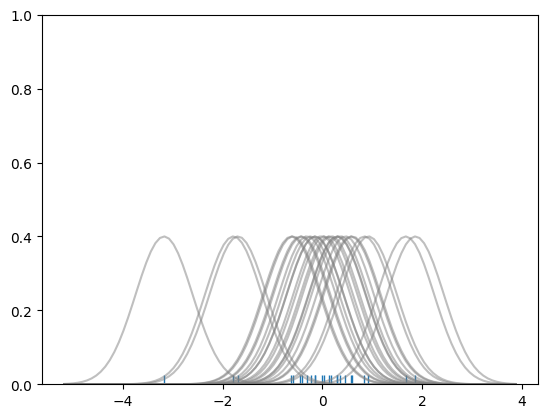

In [29]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

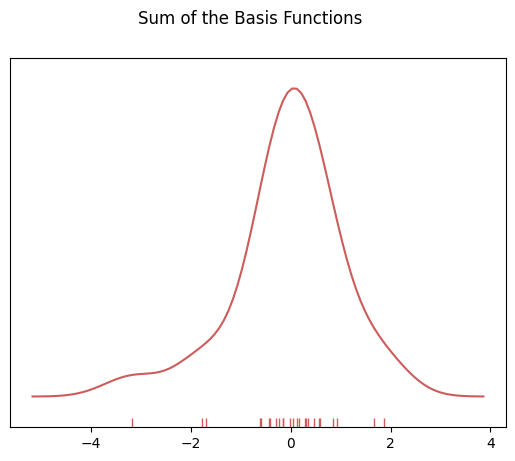

In [30]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

<Axes: xlabel='total_bill', ylabel='Density'>

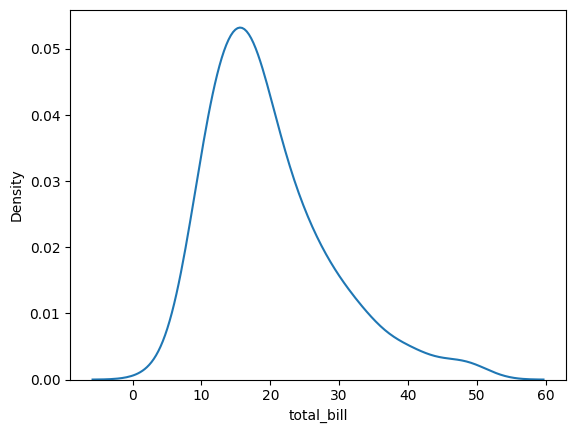

In [31]:
sns.kdeplot(tips['total_bill'])

    Catergorical Plots

<Axes: xlabel='sex', ylabel='total_bill'>

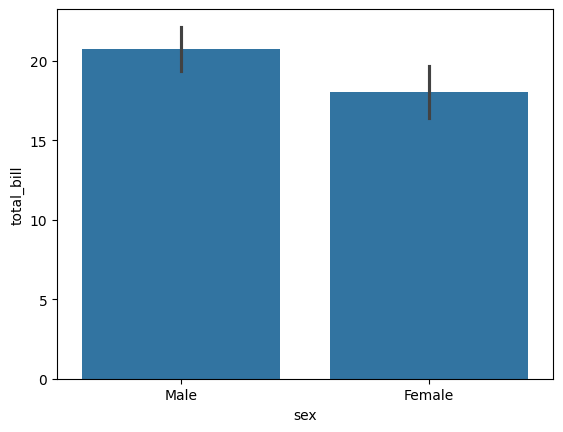

In [8]:
sns.barplot(x='sex',y='total_bill', data=tips) #here aggregator is mean (default)

In [12]:
import numpy as np

<Axes: xlabel='sex', ylabel='total_bill'>

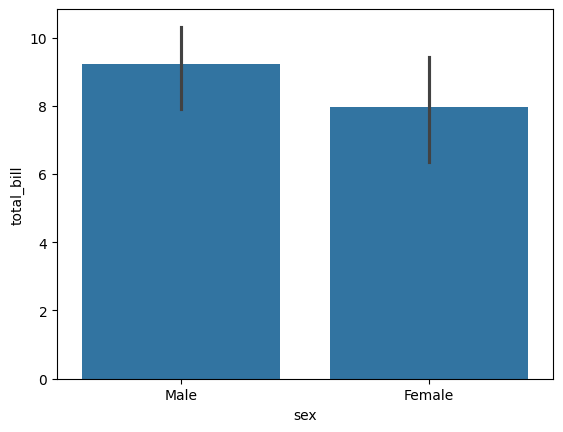

In [13]:
sns.barplot(x="sex",y="total_bill",data=tips,estimator= np.std)

    Countplot

<Axes: xlabel='sex', ylabel='count'>

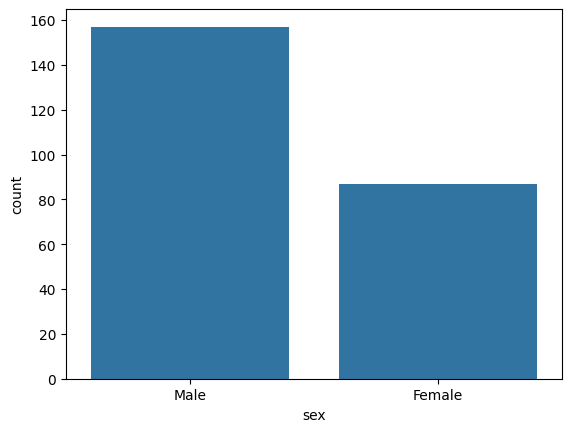

In [16]:
sns.countplot(data=tips, x='sex')

#It is basically saying count() in pandas, which count the number of occurences.

    Box plot
A box plot (also known as a box-and-whisker plot) shows the distribution of data based on a five-number summary: minimum, first quartile (Q1), median, third quartile (Q3), and maximum. It also highlights potential outliers with individual points.

<Axes: xlabel='day', ylabel='total_bill'>

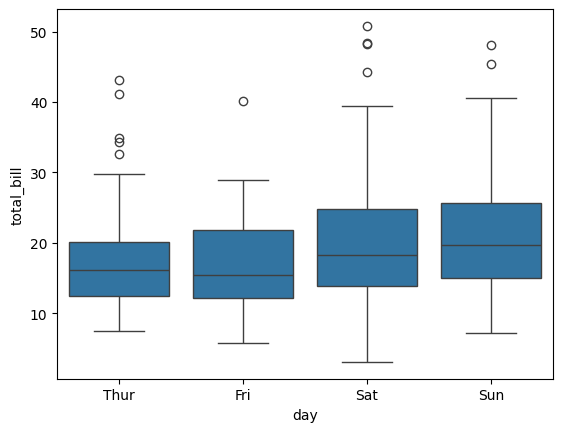

In [17]:
sns.boxplot(x='day',y='total_bill',data=tips)

<Axes: xlabel='day', ylabel='total_bill'>

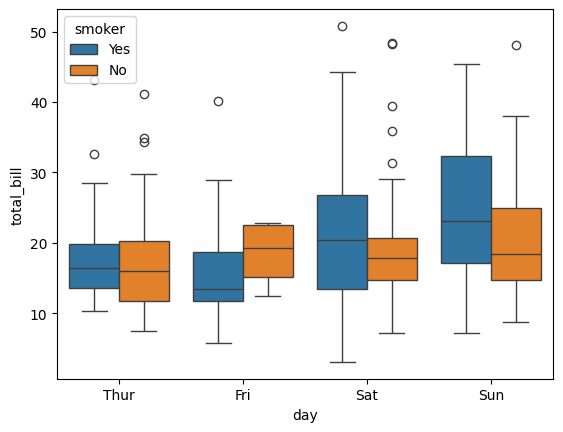

In [18]:
sns.boxplot(x='day', y='total_bill', data=tips, hue='smoker')

    Violin plot
A violin plot combines the features of a box plot with a kernel density estimate (KDE). It displays the distribution and density of the data, showing where data points are more or less concentrated.

<Axes: xlabel='day', ylabel='total_bill'>

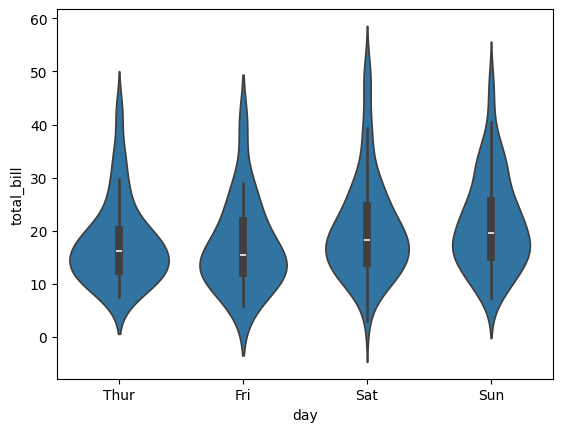

In [20]:
sns.violinplot(data=tips,x='day', y='total_bill')

<Axes: xlabel='day', ylabel='total_bill'>

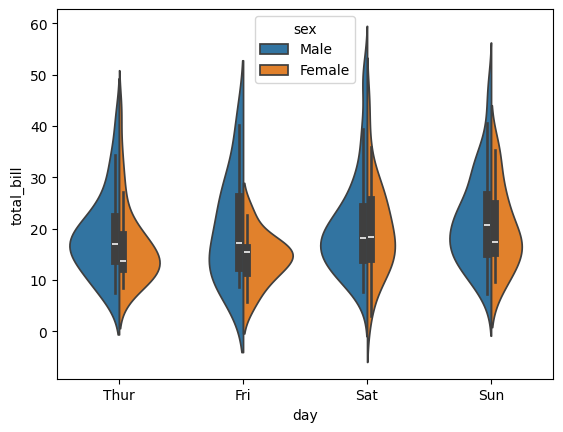

In [22]:
sns.violinplot(x='day', y='total_bill', data=tips, hue='sex', split=True)

    Strip Plot
A strip plot is a type of plot used to display the distribution of individual data points along a continuous or categorical axis. It plots each data point as a small strip (often a dot or a line) on the chart, allowing you to see all individual observations.

<Axes: xlabel='day', ylabel='total_bill'>

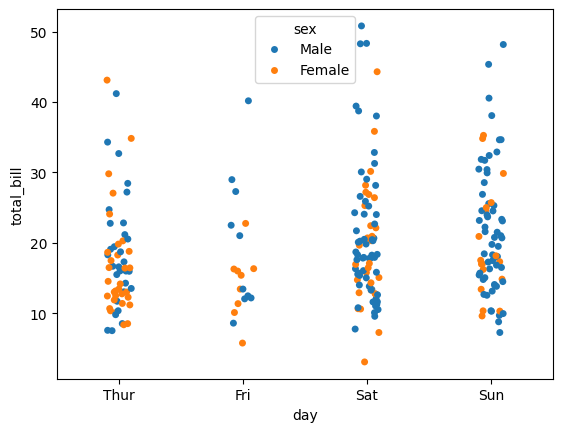

In [26]:
sns.stripplot(x='day',y='total_bill', data=tips, hue='sex')

<Axes: xlabel='day', ylabel='total_bill'>

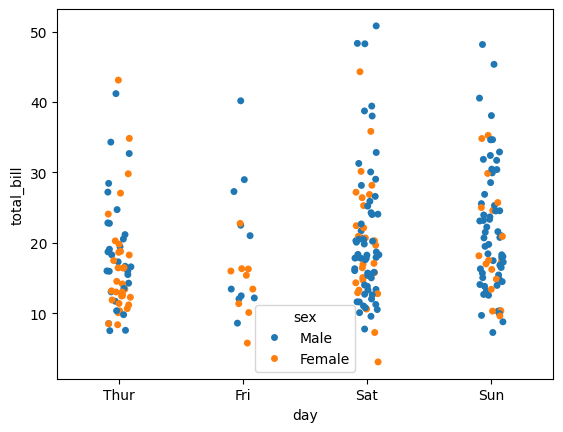

In [33]:
sns.stripplot(x='day', y='total_bill', data=tips, hue='sex')

    Swarm plot
A swarm plot is a type of scatter plot that arranges individual data points in a way that avoids overlapping while maintaining the categorical groupings of the data. Unlike strip plots (where data points can overlap or be jittered), swarm plots organize data points so that they form a "swarm" around the categories without overlap, making the plot cleaner and easier to interpret.

<Axes: xlabel='day', ylabel='total_bill'>

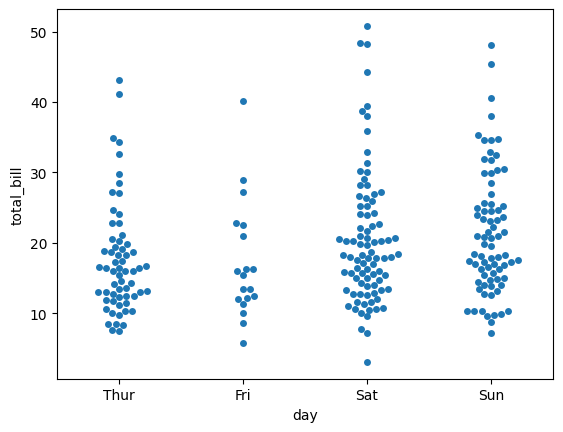

In [34]:
sns.swarmplot(data=tips,x='day',y='total_bill')

<Axes: xlabel='day', ylabel='total_bill'>

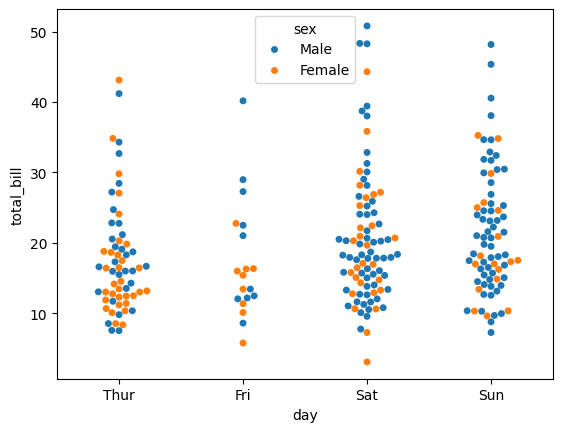

In [35]:
sns.swarmplot(x='day',y='total_bill',data=tips, hue= 'sex')

<Axes: xlabel='day', ylabel='total_bill'>

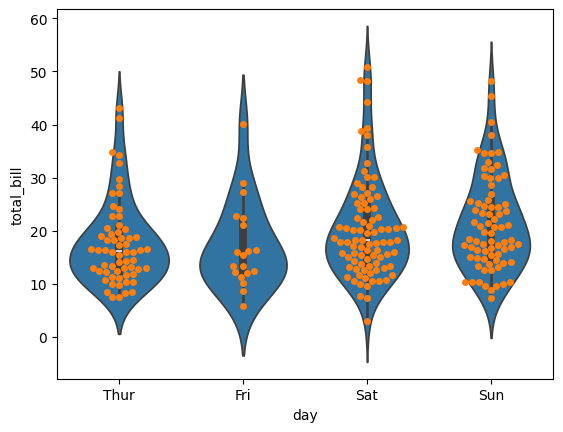

In [40]:
sns.violinplot(x='day',y='total_bill',data=tips)# hue='sex',split=True)
sns.swarmplot(x='day',y='total_bill',data=tips)

    Catplot
The catplot function in Seaborn is a versatile tool for creating categorical plots. It allows you to visualize data distributions across different categories using a variety of plot types, such as bar plots, box plots, violin plots, and more. catplot simplifies the process of creating these plots by providing a single interface to specify the type of categorical visualization you want.

It's important to note that factorplot has been deprecated in Seaborn version 0.11.0 and replaced by the more flexible catplot function.

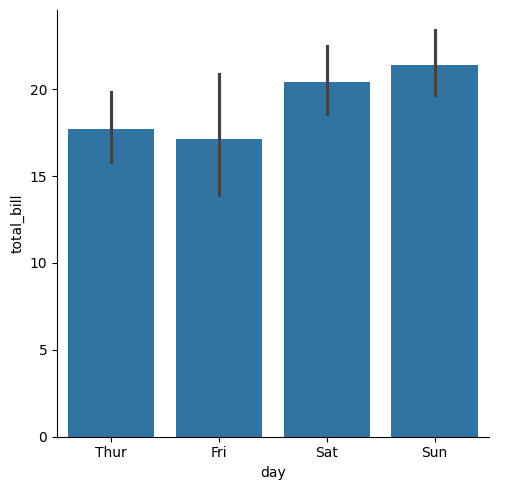

In [42]:
sns.catplot(x='day',y='total_bill',data=tips, kind = 'bar')

    Matrix Plots
A matrix plot is essentially a visual representation of a matrix or 2D array, where the values in the matrix are represented as colors. It's useful for understanding the structure and values within the matrix at a glance.

In [14]:
flights = sns.load_dataset('flights')

In [15]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


    HeatMap
A heatmap is a type of matrix plot that uses color to represent data values in a 2D matrix, making it a great tool for visualizing the distribution and intensity of values across a dataset

In [17]:
print(tips.dtypes)

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object


In [18]:
num_tips = tips.select_dtypes(include=['float64','int64'])

corr_matrix = num_tips.corr()

corr_matrix

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


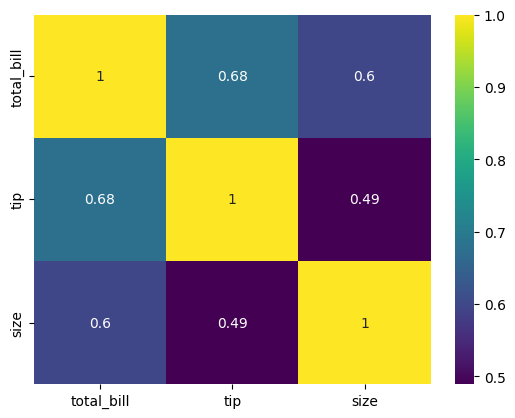

In [19]:
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.show()

        (Optional)One-hot coding
To convert categorical data like day, time, sex into numerical data

In [20]:
import pandas as pd

# Convert categorical columns to numerical using one-hot encoding
tips_encoded = pd.get_dummies(tips,drop_first=True)

# Calculate correlation matrix
encoded_corrmatrix = tips_encoded.corr()

encoded_corrmatrix

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
total_bill,1.000000,0.675734,0.598315,-0.144877,-0.085721,-0.086168,0.054919,0.122953,0.183118
tip,0.675734,1.000000,0.489299,-0.088862,-0.005929,-0.055463,-0.002790,0.125114,0.121629
size,0.598315,0.489299,1.000000,-0.086195,0.133178,-0.142184,-0.041121,0.193054,0.103411
sex_Female,-0.144877,-0.088862,-0.086195,1.000000,0.002816,0.071060,-0.053957,-0.168106,-0.205231
smoker_No,-0.085721,-0.005929,0.133178,0.002816,1.000000,-0.244316,-0.155744,0.181624,-0.054921
day_Fri,-0.086168,-0.055463,-0.142184,0.071060,-0.244316,1.000000,-0.216319,-0.195451,-0.058159
day_Sat,0.054919,-0.002790,-0.041121,-0.053957,-0.155744,-0.216319,1.000000,-0.500682,0.462709
day_Sun,0.122953,0.125114,0.193054,-0.168106,0.181624,-0.195451,-0.500682,1.000000,0.418071
time_Dinner,0.183118,0.121629,0.103411,-0.205231,-0.054921,-0.058159,0.462709,0.418071,1.000000


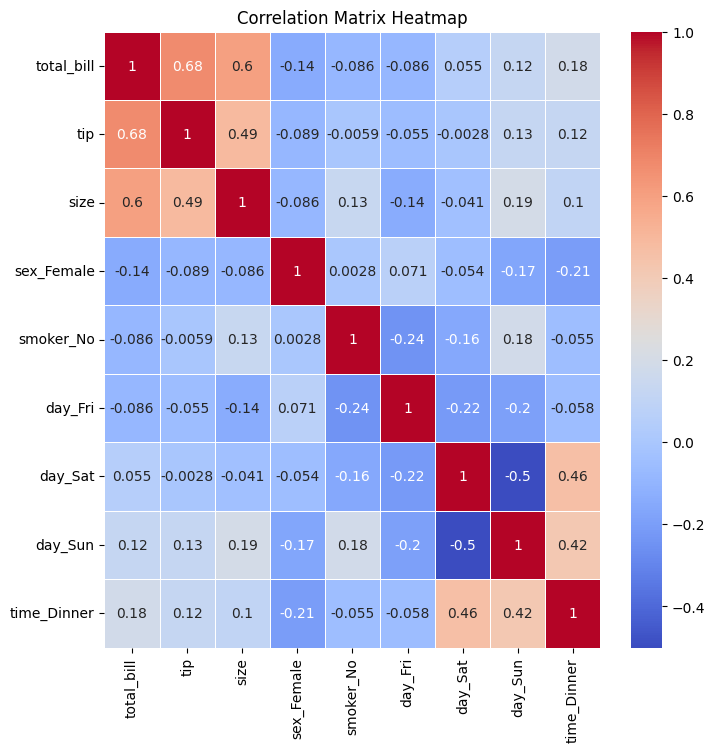

In [21]:
plt.figure(figsize=(8, 8))
sns.heatmap(encoded_corrmatrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

        Using pivot table

In [22]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [23]:
fp = flights.pivot_table(index='month', columns='year', values='passengers')

C:\Users\Avinash\AppData\Local\Temp\ipykernel_17444\396851581.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  fp = flights.pivot_table(index='month', columns='year', values='passengers')


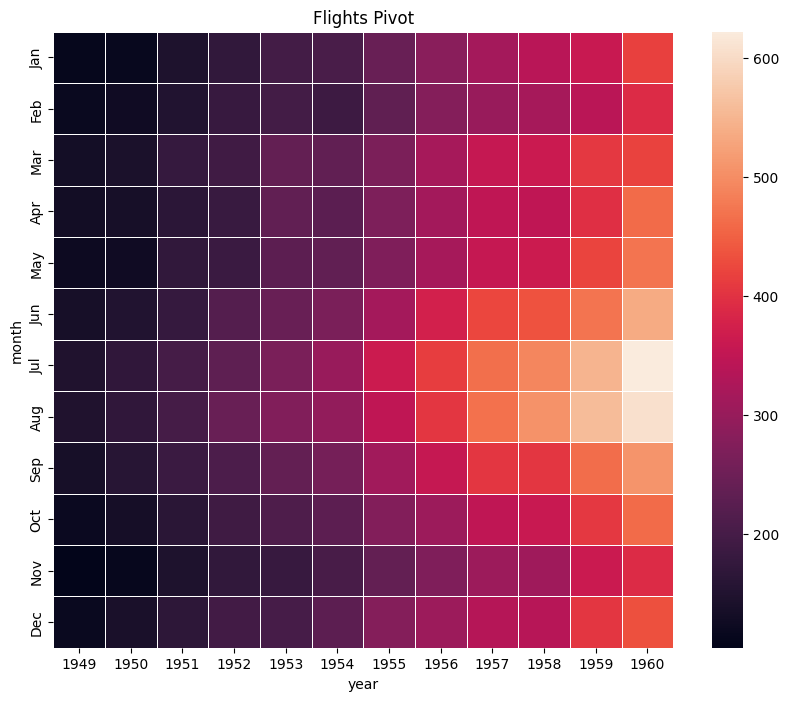

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(fp, linewidths=0.5)
plt.title('Flights Pivot')
plt.show()

    Cluster Map
A cluster map is a great way to visualize data in a heatmap, with hierarchical clustering applied to both rows and columns. In Python, the seaborn library offers a function called clustermap to easily create such visualizations. It clusters similar rows and columns together, making it easier to spot patterns in large datasets.

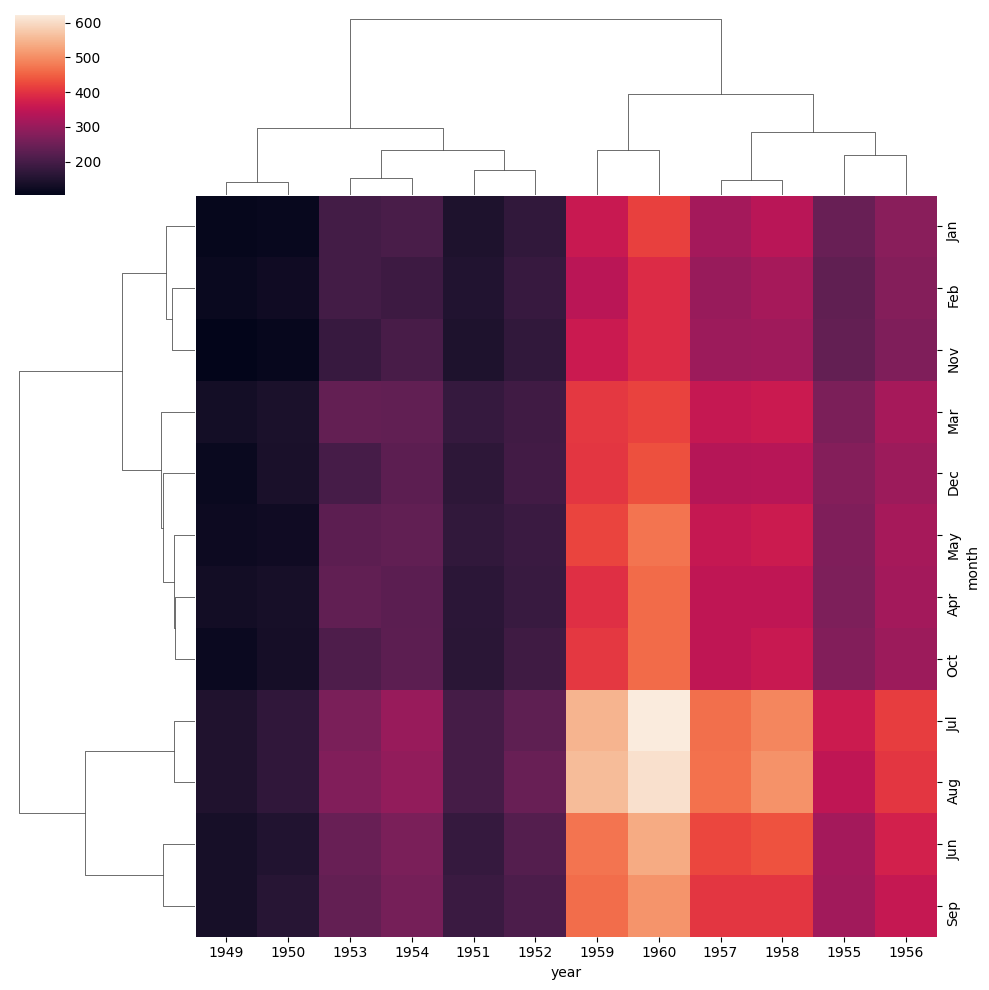

In [25]:
sns.clustermap(fp)

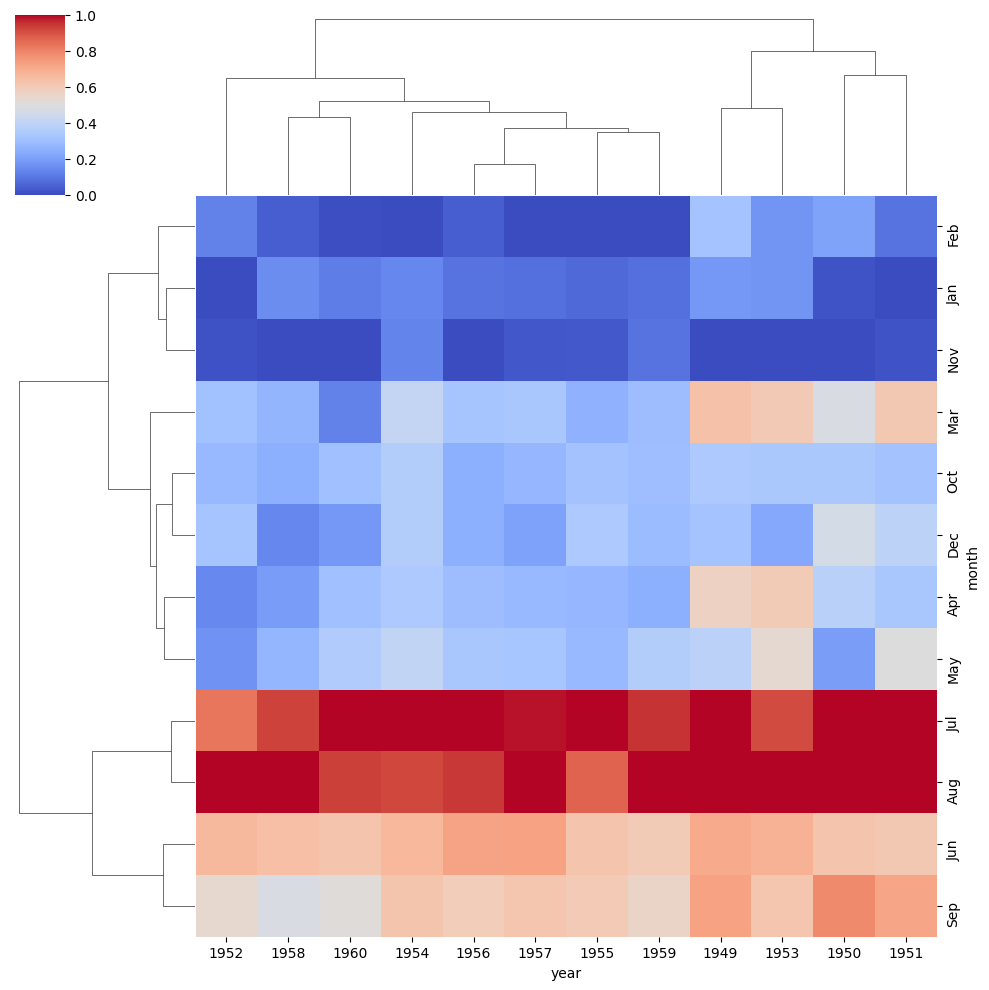

In [27]:
sns.clustermap(fp,cmap= 'coolwarm', standard_scale=1)

    Grids

In [28]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [29]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

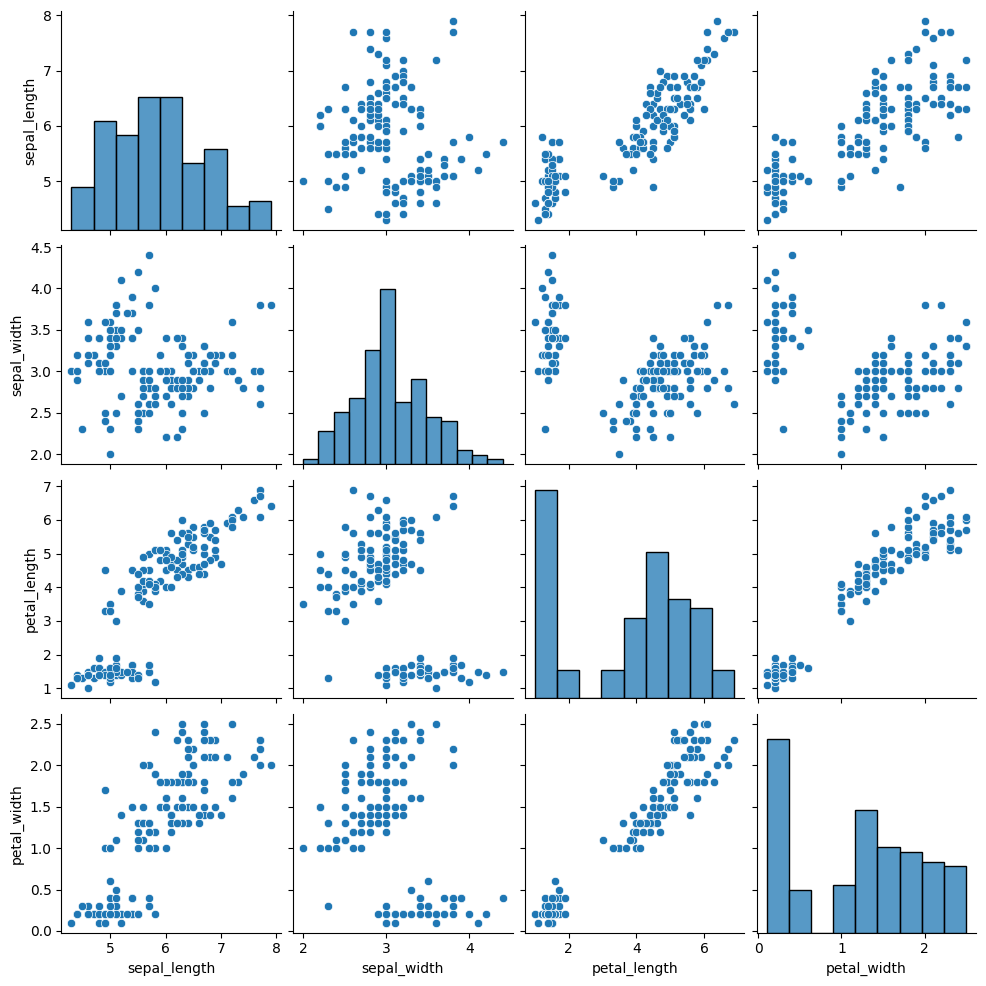

In [30]:
sns.pairplot(iris)

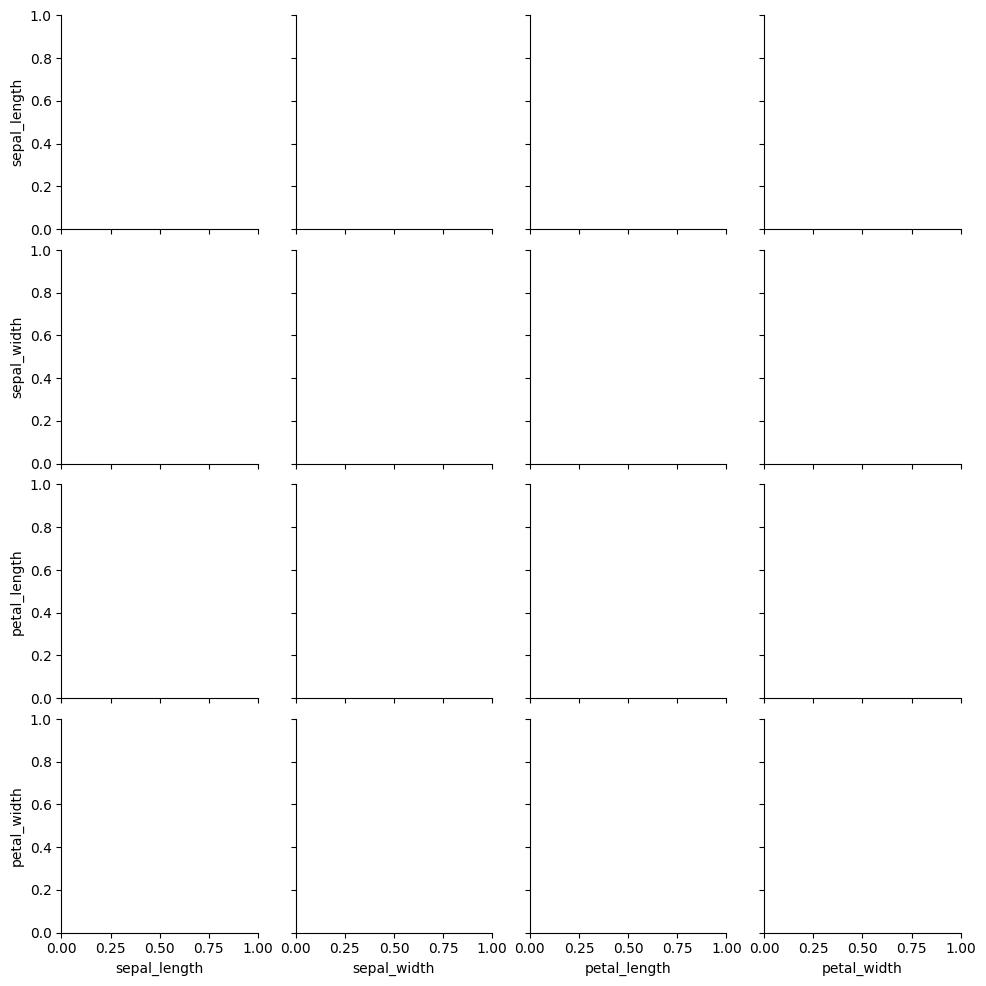

In [37]:
pg = sns.PairGrid(iris)

# pg.map(plt.scatter)

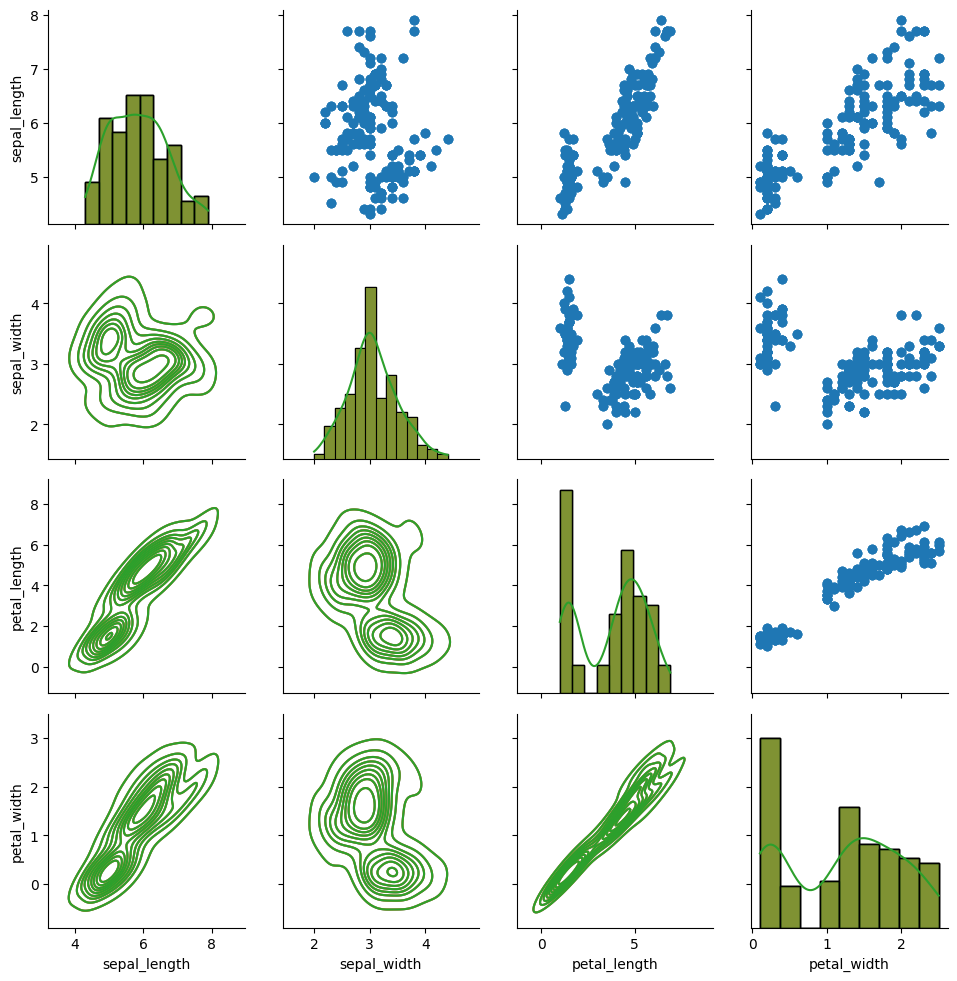

In [48]:
pg.map_diag(sns.histplot,kde=True)
pg.map_upper(plt.scatter)
pg.map_lower(sns.kdeplot)
plt.show()

    Facet Grid
A FacetGrid allows you to create a grid of plots based on the values of one or more categorical variables. It’s especially useful for visualizing relationships between variables across different subsets of your data.

In [41]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


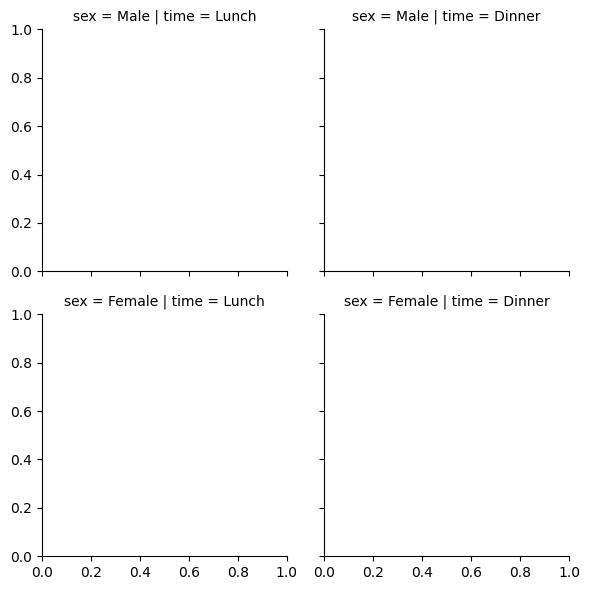

In [70]:
fg = sns.FacetGrid(data=tips,col='time',row='sex')

# fg.map(sns.histplot,'total_bill')

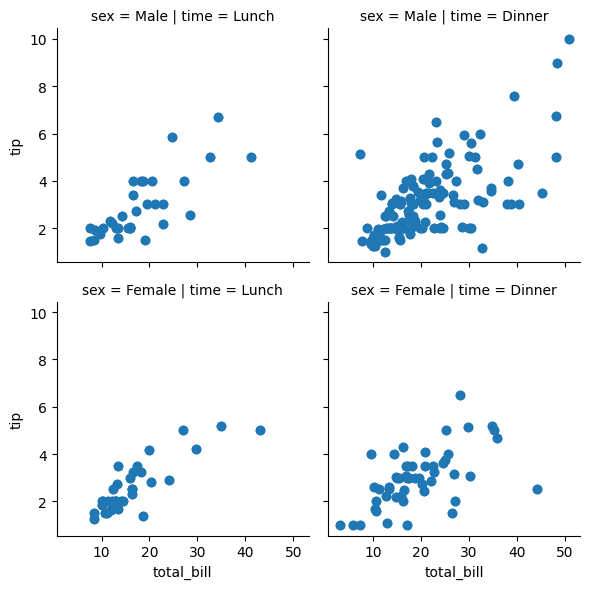

In [72]:
fg.map(plt.scatter,'total_bill','tip')
plt.show()